In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

pd.options.display.max_columns = 100
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('~/Downloads/Kurs_project_task/train.csv')

# Посмотрим на данные

In [3]:
data.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644


In [4]:
data.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
Id               10000 non-null int64
DistrictId       10000 non-null int64
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       7887 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null int64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null int64
Ecology_1        10000 non-null float64
Ecology_2        10000 non-null object
Ecology_3        10000 non-null object
Social_1         10000 non-null int64
Social_2         10000 non-null int64
Social_3         10000 non-null int64
Healthcare_1     5202 non-null float64
Helthcare_2      10000 non-null int64
Shops_1          10000 non-null int64
Shops_2          10000 non-null object
Price            10000 non-null float64
dtypes: float64(8), int64(9), object(3)
memory usage: 1.5+ MB


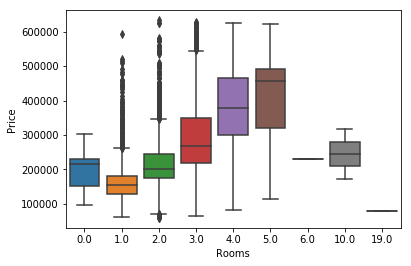

In [6]:
sns.boxplot(data['Rooms'], data['Price'])

In [7]:
# добавим колонку для анализа стоимости кв.м.

data['price_per_sqm'] = data['Price'] / data['Square']

Text(0, 0.5, 'price_per_sqm')

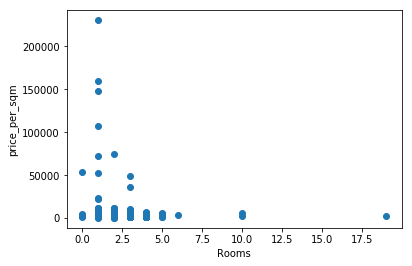

In [8]:
plt.scatter(data['Rooms'], data['price_per_sqm'])
plt.xlabel('Rooms')
plt.ylabel('price_per_sqm')

In [9]:
data.loc[data['Square'] < 15]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,price_per_sqm
212,1748,88,2.0,5.497061,67.628717,1.0,24,22.0,1977,0.127376,B,B,43,8429,3,NaN,3,9,B,412511.088764,75042.110444
1316,11526,27,1.0,4.633498,1.969969,1.0,18,1.0,1977,0.011654,B,B,4,915,0,NaN,0,0,B,107604.269441,23223.115671
1608,10202,6,1.0,2.596351,4.604943,1.0,3,25.0,2014,0.243205,B,B,5,1564,0,540.0,0,0,B,137597.601458,52996.529388
3280,10527,27,1.0,4.380726,40.805837,1.0,10,17.0,2013,0.211401,B,B,9,1892,0,NaN,0,1,B,97560.720383,22270.446581
3413,9487,5,1.0,5.129222,5.549458,1.0,1,1.0,1977,0.150818,B,B,16,3433,4,2643.0,4,5,B,369472.403061,72032.840662
4739,12676,81,3.0,13.784865,15.988889,7.0,4,5.0,1960,0.319809,B,B,25,4756,16,2857.0,5,8,B,78388.806186,5686.585073
4853,3224,27,0.0,2.377248,0.873147,0.0,1,0.0,1977,0.017647,B,B,2,469,0,NaN,0,0,B,126596.941798,53253.578837
4900,4504,27,3.0,4.390331,5.610772,1.0,8,19.0,2016,0.211401,B,B,9,1892,0,NaN,0,1,B,161379.067034,36757.837204
6392,14786,1,1.0,1.136859,4.525736,1.0,3,1.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,181434.825589,159593.107918
8030,13265,1,3.0,4.823679,79.767964,0.0,6,17.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,237716.681261,49281.194174


(array([4137., 1730.,  941.,  831., 1106.,  477.,  239.,  185.,  293.,
          61.]),
 array([0.        , 0.05218671, 0.10437341, 0.15656012, 0.20874682,
        0.26093353, 0.31312023, 0.36530694, 0.41749364, 0.46968035,
        0.52186705]),
 <a list of 10 Patch objects>)

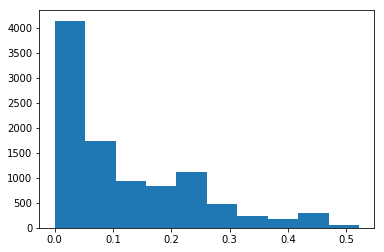

In [10]:
plt.hist(data['Ecology_1'])

In [11]:
data['Ecology_2'].value_counts(normalize=True)

B    0.9903
A    0.0097
Name: Ecology_2, dtype: float64

In [12]:
data['Ecology_3'].value_counts(normalize=True)

B    0.9725
A    0.0275
Name: Ecology_3, dtype: float64

In [13]:
data['Helthcare_2'].value_counts(normalize=True)

0    0.4214
1    0.2183
3    0.1670
2    0.1158
5    0.0388
4    0.0288
6    0.0099
Name: Helthcare_2, dtype: float64

In [14]:
data['Shops_1'].value_counts(normalize=True)

0     0.2316
1     0.1325
5     0.1324
2     0.0964
4     0.0841
3     0.0711
6     0.0487
11    0.0401
9     0.0316
7     0.0294
8     0.0253
23    0.0245
10    0.0215
15    0.0176
16    0.0083
19    0.0049
Name: Shops_1, dtype: float64

In [15]:
data['Shops_2'].value_counts(normalize=True)

B    0.9175
A    0.0825
Name: Shops_2, dtype: float64

## Выводы: 
1. Есть недостающие данные (LifeSquare и Healthcare_1)
2. Есть потенциальные выбросы - маленькие площади (до 13 кв м) и количество комнат - 0 и больше 5. 
3. Интересные факторы для построения модели - DistrictId,	Rooms,	Square,	Floor, Ecology_1, Ecology_2, Ecology_3, Social_1, Social_2, Social_3, Helthcare_2,	Shops_1,	Shops_2	

# Разделим данные на тренировочный и валидационный датасеты

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
train, valid = train_test_split(data, test_size=0.3)

In [18]:
train.shape, valid.shape

((7000, 21), (3000, 21))

# Очистим данные и добавим новый фактор (средняя цена по районам)

In [19]:
# Заполним недостающие данные поля LifeSquare с использованием среднего отношения LifeSquare/Square по существующим данным

def fill_ls(df):
    mean_ls_to_s= df.loc[data['LifeSquare'].notnull()].sum()['LifeSquare'] / df.loc[data['LifeSquare'].notnull()].sum()['Square']
    df['LifeSquare'] = df['LifeSquare'].fillna(mean_ls_to_s * df['Square'])
    return df

In [20]:
mean_square = train.loc[(train['Rooms'] < 6) & (train['Rooms'] > 0)].groupby('Rooms', as_index=False)['Square'].mean()
mean_square

,Rooms,Square
0,1.0,41.222139
1,2.0,57.160783
2,3.0,76.667054
3,4.0,99.572757
4,5.0,121.854223


In [21]:
def room_fixer(df, ms):
    bad_rooms = df.loc[(data['Rooms'] == 0) | (df['Rooms'] > 5)][['Rooms', 'Square']]
    good_rooms = (pd.merge_asof(bad_rooms.reset_index().sort_values('Square'), 
                              ms.sort_values('Square'), 
                              on='Square', direction='nearest')
                   .set_index('index')
                )
    df['Rooms'].update(good_rooms['Rooms_y'])
    return df

In [22]:
def square_fixer(df, ms):
    bad_square = df.loc[data['Square'] < 15][['Rooms', 'Square']]
    good_square = (pd.merge_asof(bad_square.reset_index().sort_values('Rooms'), 
                              ms.sort_values('Rooms'), 
                              on='Rooms', direction='nearest')
                   .set_index('index')
                )
    df['Square'].update(good_square['Square_y'])
    return df

In [23]:
train = room_fixer(train, mean_square)
train = square_fixer(train, mean_square)

In [24]:
def ecology_bin(df):
    df.loc[df['Ecology_2'] == 'B', 'Ecology_2'] = 1
    df.loc[df['Ecology_2'] == 'A', 'Ecology_2'] = 0
    df.loc[df['Ecology_3'] == 'B', 'Ecology_2'] = 1
    df.loc[df['Ecology_3'] == 'A', 'Ecology_2'] = 0
    return df

In [25]:
mean_district = train.groupby(['DistrictId', 'Rooms'], as_index=False)[['Price']].mean()
mean_district = mean_district.rename(columns={'Price':'mean_district_price'})
mean_district.head()


,DistrictId,Rooms,mean_district_price
0,0,1.0,144275.236416
1,0,2.0,193768.638543
2,0,3.0,312560.583694
3,1,1.0,148797.435734
4,1,2.0,199467.363058


In [26]:
mean_rooms = train.groupby(['Rooms'], as_index=False)[['Price']].mean()
mean_rooms = mean_rooms.rename(columns={'Price':'mean_district_price_2'})
mean_rooms

,Rooms,mean_district_price_2
0,1.0,158537.058812
1,2.0,215442.705879
2,3.0,289237.528269
3,4.0,377739.444196
4,5.0,358927.244804


In [27]:
def add_mean_district_price(df, mp1, mp2):
    df = pd.merge(df, mp1, on=['DistrictId', 'Rooms'], how='left')
    df = pd.merge(df, mp2, on='Rooms', how='left')
    df.loc[df['mean_district_price_2'].isnull(), 'mean_district_price_2'] = mp2.loc[mp2['Rooms']==5, 'mean_district_price_2'].values[0]
    df.loc[df['mean_district_price'].isnull(), 'mean_district_price'] = df['mean_district_price_2']
    return df

In [28]:
def prepare_df(df,ms=mean_square, mp1=mean_district, mp2=mean_rooms):
    df = ecology_bin(df)
    df = room_fixer(df, ms)
    df = square_fixer(df,ms)
    df = fill_ls(df)
    df = add_mean_district_price(df, mp1, mp2)
    df = pd.get_dummies(df)
    return df

In [29]:
train = prepare_df(train)

In [30]:
valid = prepare_df(valid)

In [31]:
train.shape, valid.shape

((7000, 25), (3000, 25))

In [32]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7000 entries, 0 to 6999
Data columns (total 25 columns):
Id                       7000 non-null int64
DistrictId               7000 non-null int64
Rooms                    7000 non-null float64
Square                   7000 non-null float64
LifeSquare               7000 non-null float64
KitchenSquare            7000 non-null float64
Floor                    7000 non-null int64
HouseFloor               7000 non-null float64
HouseYear                7000 non-null int64
Ecology_1                7000 non-null float64
Ecology_2                7000 non-null int64
Social_1                 7000 non-null int64
Social_2                 7000 non-null int64
Social_3                 7000 non-null int64
Healthcare_1             3648 non-null float64
Helthcare_2              7000 non-null int64
Shops_1                  7000 non-null int64
Price                    7000 non-null float64
price_per_sqm            7000 non-null float64
mean_district_price 

In [33]:
train.columns

Index(['Id', 'DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare',
       'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Ecology_2',
       'Social_1', 'Social_2', 'Social_3', 'Healthcare_1', 'Helthcare_2',
       'Shops_1', 'Price', 'price_per_sqm', 'mean_district_price',
       'mean_district_price_2', 'Ecology_3_A', 'Ecology_3_B', 'Shops_2_A',
       'Shops_2_B'],
      dtype='object')

In [34]:
features = ['Rooms','Square','LifeSquare','Floor','Ecology_1','Social_1','Social_2','Social_3','Helthcare_2','Shops_1','mean_district_price'
            , 'Ecology_3_A', 'Shops_2_A',
       'Shops_2_B']

# Подбор параметров и моделирование

In [35]:
from sklearn.ensemble import RandomForestRegressor as RF
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score as r2

In [36]:
estimator = RF()
grid_params = {
            "n_estimators" : [60, 80,100,120],
            "max_features" : [4, 6, 8, 10, 12],
            "max_depth"    : [5, 7, 9, 11]
        }

In [37]:
grid = GridSearchCV(estimator, grid_params, scoring = 'r2')

In [38]:
grid.fit(train.loc[:,features], train['Price'])


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [60, 80, 100, 120], 'max_features': [4, 6, 8, 10, 12], 'max_depth': [5, 7, 9, 11]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=0)

In [39]:
max_depth = grid.best_params_['max_depth']
max_features = grid.best_params_['max_features']
n_estimators = grid.best_params_['n_estimators']
print(max_depth, max_features, n_estimators)

11 6 80


In [40]:
model = RF(max_depth=max_depth, max_features=max_features, n_estimators=n_estimators, random_state=23)
model.fit(train.loc[:,features], train['Price'])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=11,
           max_features=6, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=80, n_jobs=None, oob_score=False, random_state=23,
           verbose=0, warm_start=False)

In [41]:
pred_train = model.predict(train.loc[:,features])

In [42]:
pred_valid = model.predict(valid.loc[:,features])

In [43]:
r2(train['Price'],pred_train)

0.8916115332387715

In [44]:
r2(valid['Price'], pred_valid)

0.7082930197467652

# Предсказания на тестовом датасете и экспорт результатов

In [45]:
test = pd.read_csv('~/Downloads/Kurs_project_task/test.csv')

In [46]:
test = prepare_df(test)

In [47]:
test['Price'] = model.predict(test.loc[:,features])

In [48]:
test['price_per_sqm'] = test['Price'] / test['Square']

In [49]:
test.head(10)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,mean_district_price,mean_district_price_2,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B,Price,price_per_sqm
0,725,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,1,11,2748,1,NaN,0,0,173246.949479,215442.705879,0,1,0,1,164582.645356,3299.397028
1,15856,74,2.0,69.263183,34.972508,1.0,6,1.0,1977,0.075779,1,6,1437,3,NaN,0,2,238195.120573,215442.705879,0,1,0,1,236889.456423,3420.135266
2,5480,190,1.0,13.597819,15.948246,12.0,2,5.0,1909,0.000000,1,30,7538,87,4702.0,5,5,158537.058812,158537.058812,0,1,0,1,137269.916389,10094.995486
3,15664,47,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,1,23,4583,3,NaN,3,3,201684.158448,215442.705879,0,1,0,1,258453.571147,3538.200800
4,14275,27,1.0,47.527111,43.387569,1.0,17,17.0,2017,0.072158,1,2,629,1,NaN,0,0,122662.095640,158537.058812,0,1,1,0,141728.966311,2982.065693
5,7633,53,1.0,40.675627,20.538020,1.0,21,21.0,1977,0.049637,1,34,7759,0,229.0,1,3,195223.699326,158537.058812,0,1,0,1,205967.266996,5063.653212
6,13329,23,2.0,68.099538,64.843025,1.0,2,17.0,1977,0.075779,1,6,1437,3,NaN,0,2,138125.490287,215442.705879,0,1,0,1,164226.932357,2411.571904
7,5502,32,2.0,48.193897,32.857644,6.0,5,14.0,1972,0.135650,1,46,7960,6,350.0,3,11,223765.486228,215442.705879,0,1,0,1,205000.105703,4253.652780
8,4220,96,3.0,72.277106,45.968758,9.0,17,17.0,1997,0.041116,1,53,14892,4,NaN,1,4,328822.354115,289237.528269,0,1,0,1,316866.300693,4384.047963
9,11538,6,3.0,80.219400,47.660260,9.0,13,17.0,2014,0.243205,1,5,1564,0,540.0,0,0,214594.586993,289237.528269,0,1,0,1,215754.397074,2689.553873


In [50]:
output = test.loc[:,['Id','Price']]
output.head()

,Id,Price
0,725,164582.645356
1,15856,236889.456423
2,5480,137269.916389
3,15664,258453.571147
4,14275,141728.966311


In [51]:
output.to_csv('MBiryukov_predictions.csv', index=False)